# Video Game Sales Exploratory Data Analysis

## Import necessary librairies and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\Ronald\\Desktop\\Data Analyst\\00_Ron\\02_Projects\\00_Github\\20240721_Python Video game sales EDA project\\Video-Game-Sales-python-analysis\\notebooks': ['Video Games Sales Exploratory Data Analysis.ipynb']


In [7]:
# Import the dataframe
sales_df = pd.read_csv("./Data/video_games_sales.csv")

FileNotFoundError: [Errno 2] No such file or directory: './Data/video_games_sales.csv'

## Data cleaning and preparation

### Get to know the data

In [ ]:
sales_df.shape

(16719, 16)

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Looking for irrelevant and unwanted informations

In [ ]:
# Are there duplicates ?
sales_df[sales_df[['Name', 'Platform', 'Year_of_Release']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.22,0.00,0.23,2.56,83.0,22.0,5.5,101.0,EA Tiburon,E
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
16233,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


In [ ]:
# Drop duplicates
sales_df = sales_df.drop([14246, 16233])

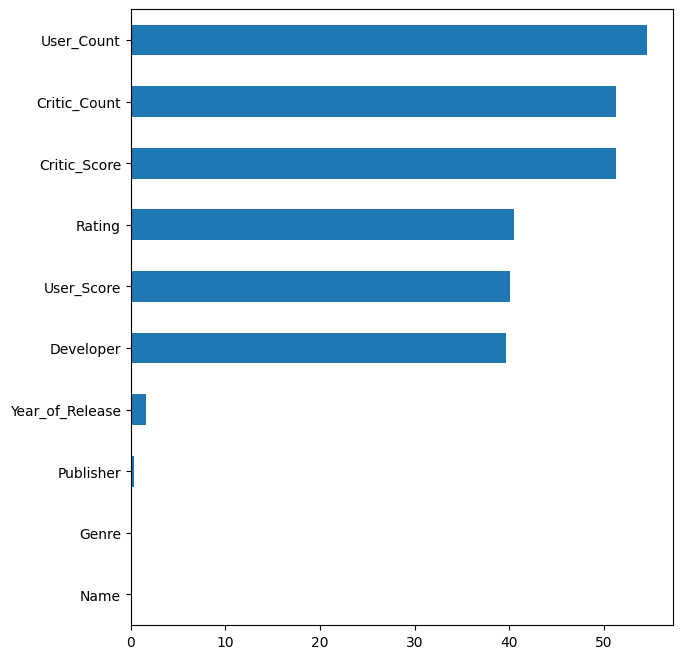

In [ ]:
#Find most features with missing values
missing_percentages = (sales_df.isna().sum().sort_values(ascending=True) *100)/sales_df.shape[0]
missing_percentages[missing_percentages != 0].plot(kind='barh', figsize=(14,8));

In [ ]:
# Drop features with 40% + missing values
sales_df = sales_df.drop(
    columns=['User_Score', 'User_Count', 'Developer', 'Rating',
             'Critic_Score', 'Critic_Count'])

In [ ]:
# Look for missing vales in the 'Name' column
sales_df[sales_df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.0,0.08,2.39


In [ ]:
# Drop missing value
sales_df = sales_df.drop([659])

In [ ]:
sales_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
sales_df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
# Extract the clean dataset
sales_df.to_csv('./data/clean_data.csv')
sales_df.to_excel('./data/clean_data.xlsx')

The dataset is now ready for some analysis

## Answering some research questions

### 1- Top selling games

- Which games have the highest global sales ? (top 10)

In [ ]:
top10glob = sales_df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top10glob

Name
Wii Sports                        82.53
Grand Theft Auto V                56.57
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Black Ops           30.82
Call of Duty: Modern Warfare 3    30.59
New Super Mario Bros.             29.80
Name: Global_Sales, dtype: float64

In [ ]:
plt.figure(figsize=(14,8))
top10glob.plot(kind='bar',
               title='Top 10 highest global sales games',
               xlabel='Games',
               ylabel='Global sales (in millions)'
               );

NameError: name 'plt' is not defined

- How do the top-selling games differ by region ?

In [ ]:
# Define the number of top-selling games to select
top_n = 10

# Identify top n selling games in North America
top_NA_games = sales_df[['Name', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False).head(top_n)
top_NA_games['Region'] = 'North America'

# Identify top n selling games in Europa
top_EU_games = sales_df[['Name', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False).head(top_n)
top_EU_games['Region'] = 'Europa'

# Identify the top n selling games in Japan
top_JP_games = sales_df[['Name', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False).head(top_n)
top_JP_games['Region']='Japan'

# Identify top-selling games in Other regions
top_other_games = sales_df[['Name', 'Other_Sales']].sort_values(by='Other_Sales', ascending=False).head(top_n)
top_other_games['Region'] = 'Other Regions'

top_games = pd.concat([top_NA_games.rename(columns={'NA_Sales' : 'Sales'}),
                       top_EU_games.rename(columns={'EU_Sales': 'Sales'}),
                       top_JP_games.rename(columns={'JP_Sales': 'Sales'}),
                       top_other_games.rename(columns={'Other_Sales': 'Sales'})])

# Display the top games by region
print(top_games)


                                             Name  Sales         Region
0                                      Wii Sports  41.36  North America
1                               Super Mario Bros.  29.08  North America
9                                       Duck Hunt  26.93  North America
5                                          Tetris  23.20  North America
2                                  Mario Kart Wii  15.68  North America
3                               Wii Sports Resort  15.61  North America
14                             Kinect Adventures!  15.00  North America
8                       New Super Mario Bros. Wii  14.44  North America
7                                        Wii Play  13.96  North America
18                              Super Mario World  12.78  North America
0                                      Wii Sports  28.96         Europa
2                                  Mario Kart Wii  12.76         Europa
10                                     Nintendogs  10.95        

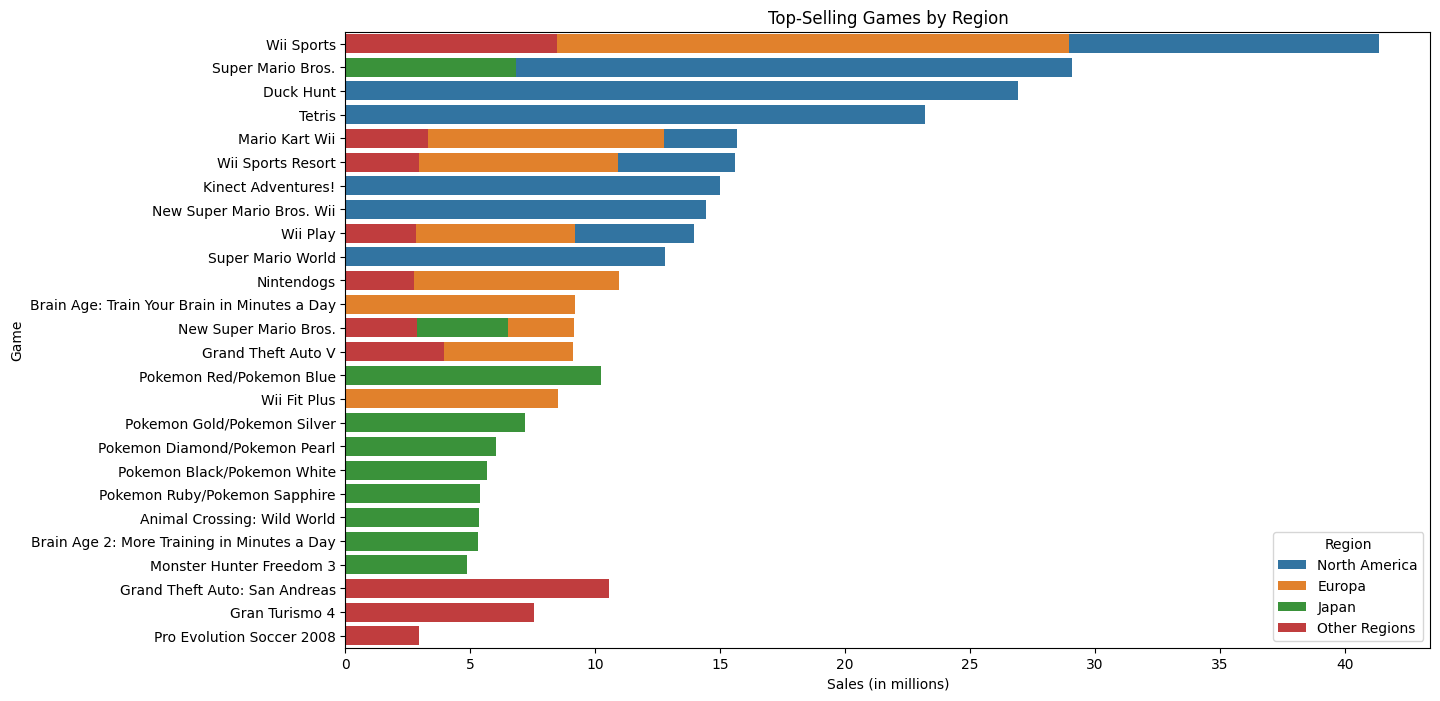

In [ ]:
# Visualize the top games by region
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales', y='Name', hue='Region', data=top_games, dodge=False)
plt.title('Top-Selling Games by Region')
plt.xlabel('Sales (in millions)')
plt.ylabel('Game')
plt.legend(title='Region')
plt.show()

### 2- Platform Analysis

- Which platforms have the highest total sales globally ?

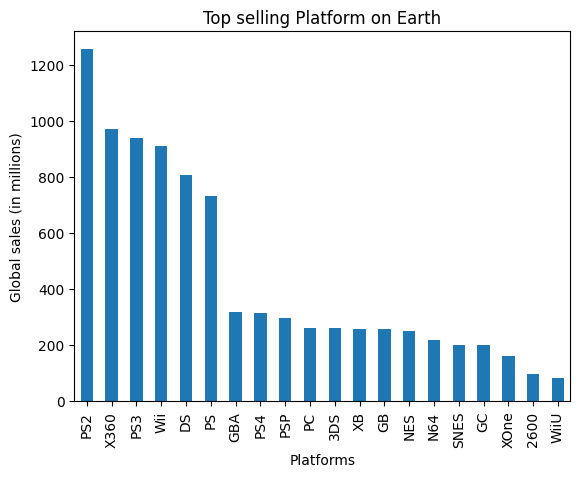

In [ ]:
# Plot global top-selling platforms
sales_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(20).plot(
    kind='bar',
    figsize=(14,8),
    title='Top selling Platform on Earth',
    ylabel= 'Global sales (in millions)',
    xlabel='Platforms'
);

- How do sells differ  across platforms in different regions ?

In [ ]:
# Aggregate sales data by platform and region
platform_sales_by_region = sales_df.groupby('Platform').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
platform_sales_by_region.head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,90.60,5.47,0.00,0.91
3DO,0.00,0.00,0.10,0.00
3DS,83.49,61.48,100.67,13.36
DC,5.43,1.69,8.56,0.27
DS,382.67,188.89,175.57,59.28


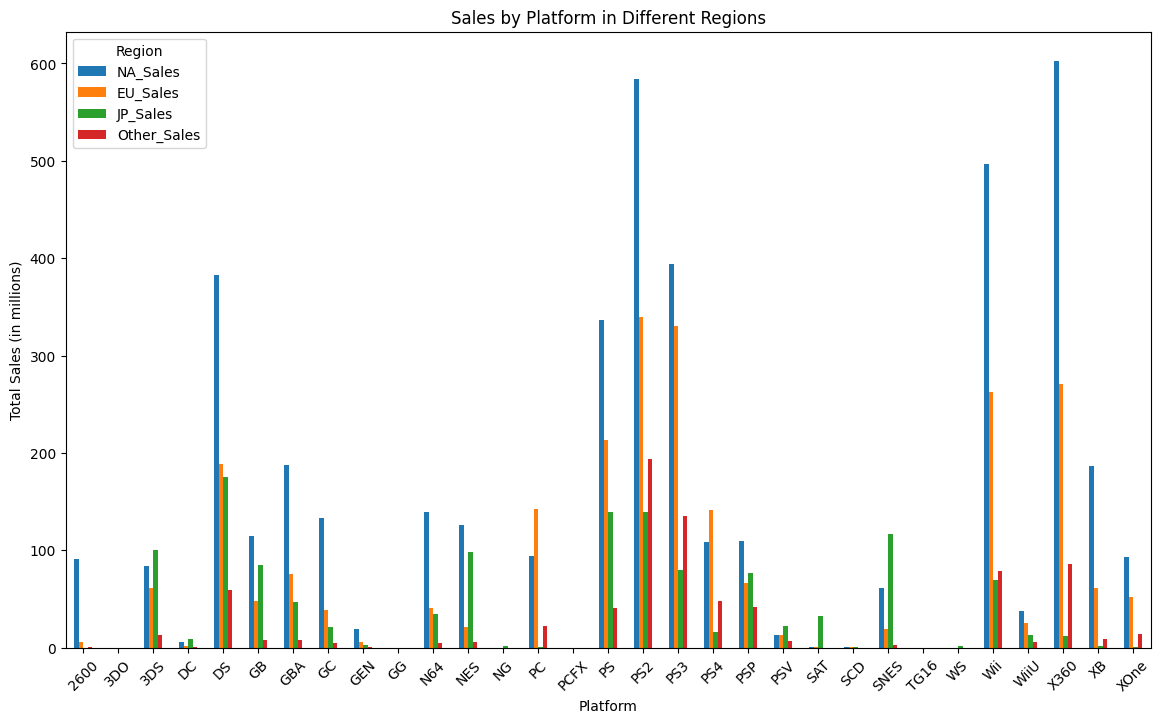

In [ ]:
# Plot sales by region for each platform
platform_sales_by_region.plot(kind='bar', figsize=(14, 8))
plt.title('Sales by Platform in Different Regions')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()

### 3- Genre Trends

- Which genres are the most present on the market ?

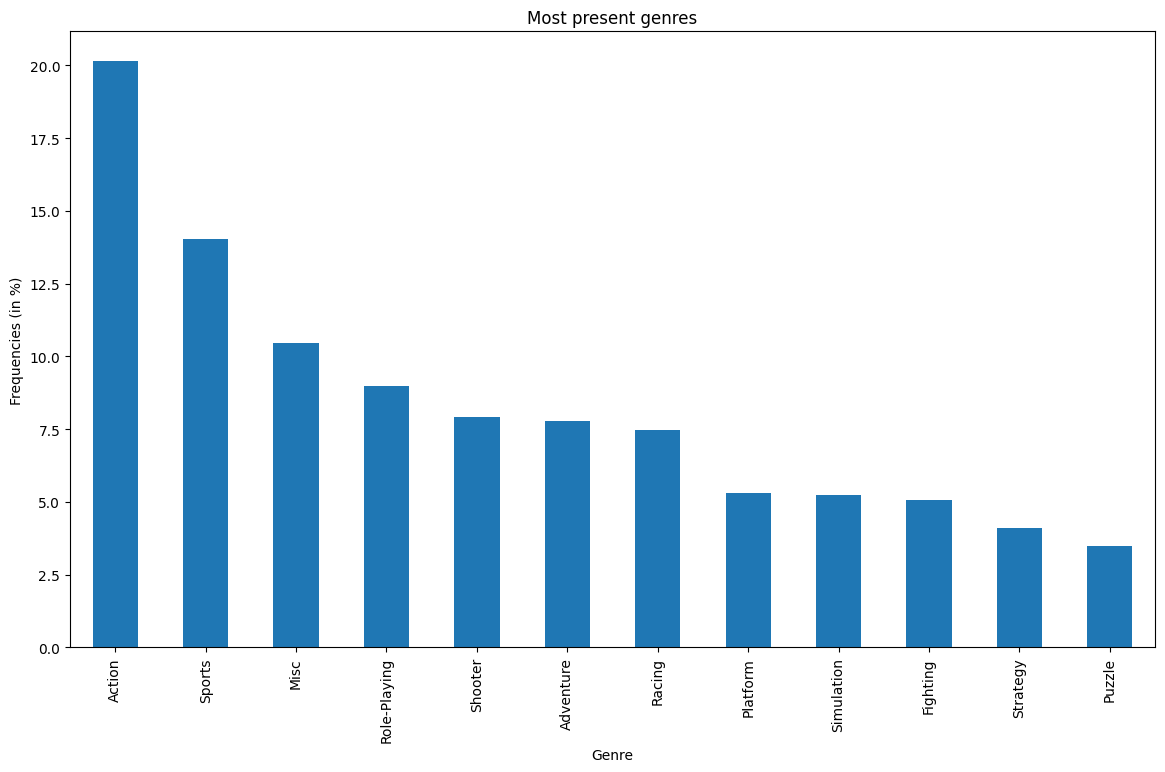

In [ ]:
# Plot most present genre in the dataset
(sales_df['Genre'].value_counts(normalize=True)*100).plot(
    kind='bar',
    figsize=(14, 8),
    ylabel='Frequencies (in %)',
    title='Most present genres'
);

- What genres are the most sold globally ?

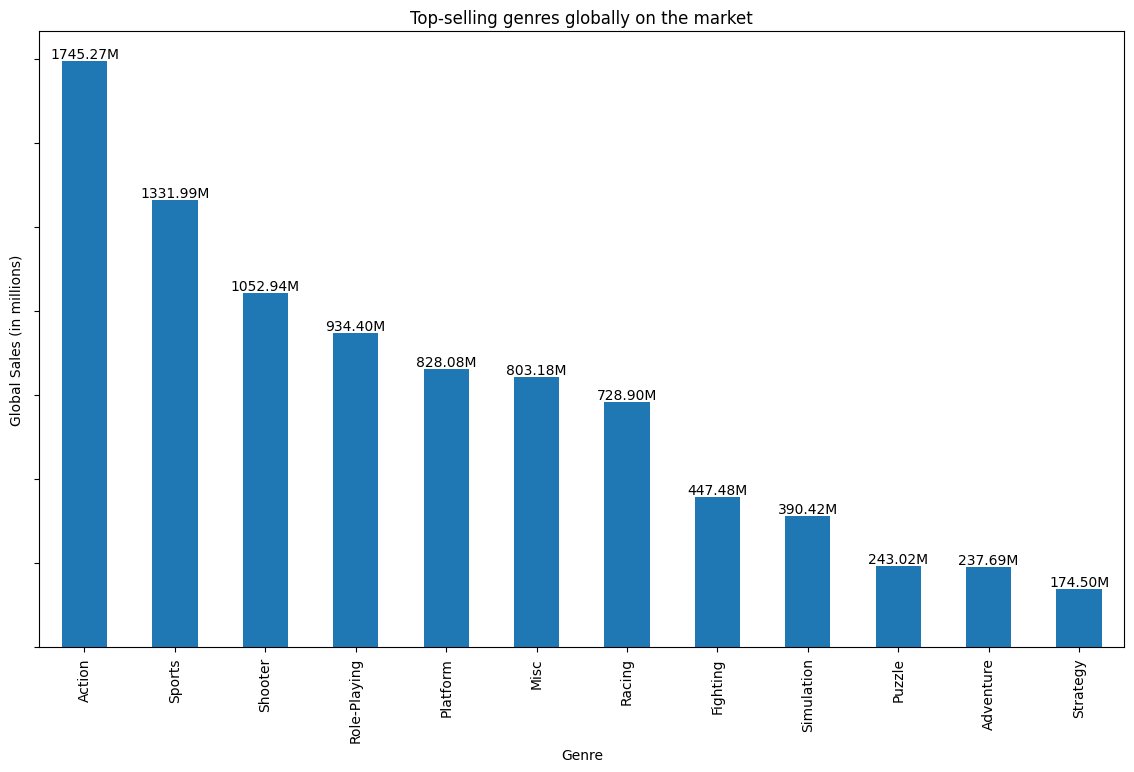

In [ ]:
# Group by genre and sum the global sales
genre_sales = sales_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Create the bar plot
ax = genre_sales.plot(kind='bar', figsize=(14, 8), title="Top-selling genres globally on the market")

# Remove y-axis labels
ax.set(yticklabels=[])

# Add individual labels for each bar
for i, value in enumerate(genre_sales):
    ax.text(i, value, f"{value:.2f}M", ha='center', va='bottom')

plt.ylabel('Global Sales (in millions)')
plt.show()

- How do top-selling genres differ by region ?

In [ ]:
# Aggregate sales data by Genre and region
genre_sales_by_region = sales_df.groupby('Genre')[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']].sum()
genre_sales_by_region 

,NA_Sales,JP_Sales,EU_Sales,Other_Sales
Genre,,,,
Action,879.01,161.44,519.13,184.60
Adventure,105.26,52.30,63.54,16.49
Fighting,223.36,87.48,100.33,36.36
Misc,407.27,108.11,212.74,74.39
Platform,445.50,130.83,200.35,51.09
Puzzle,122.87,57.31,50.01,12.38
Racing,359.35,56.71,236.51,76.10
Role-Playing,330.81,355.46,188.71,59.63
Shooter,592.24,38.76,317.34,104.11


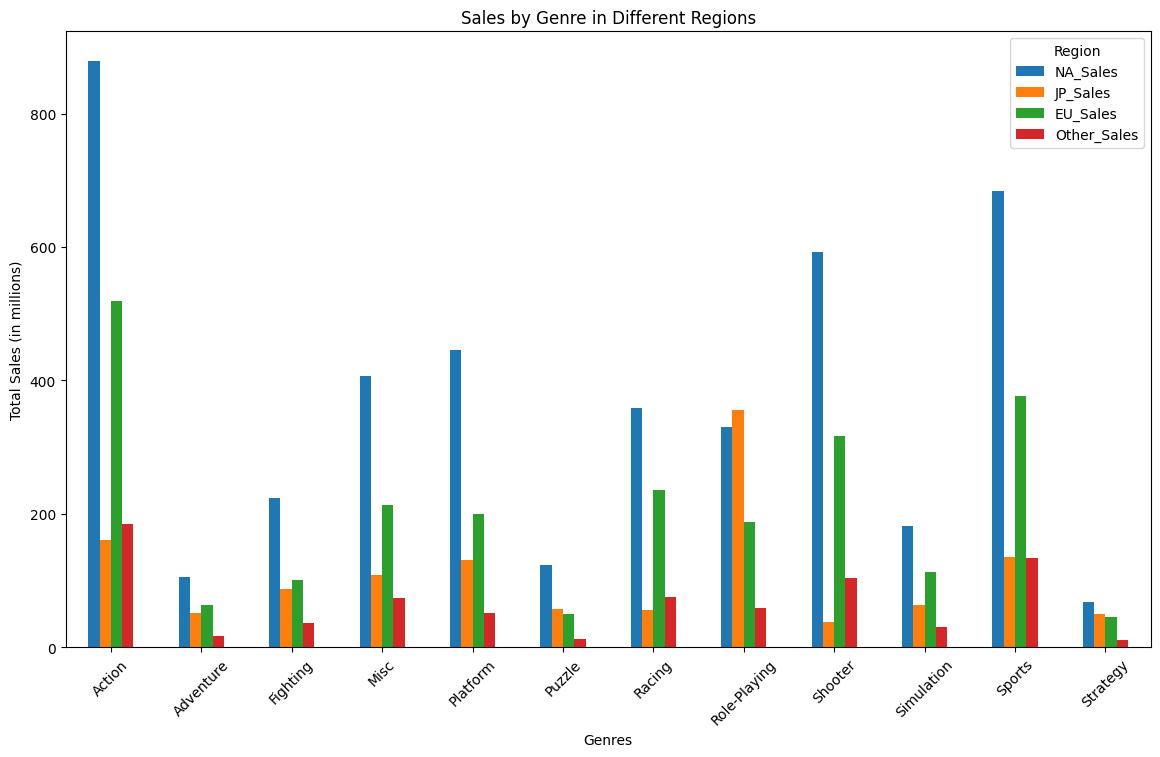

In [ ]:
# Plot sales by region for each genre
genre_sales_by_region.plot(kind='bar', figsize=(14, 8))
plt.title('Sales by Genre in Different Regions')
plt.xlabel('Genres')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()

### 4- Plubisher Performance

- Which publishers have the highest total sales ?

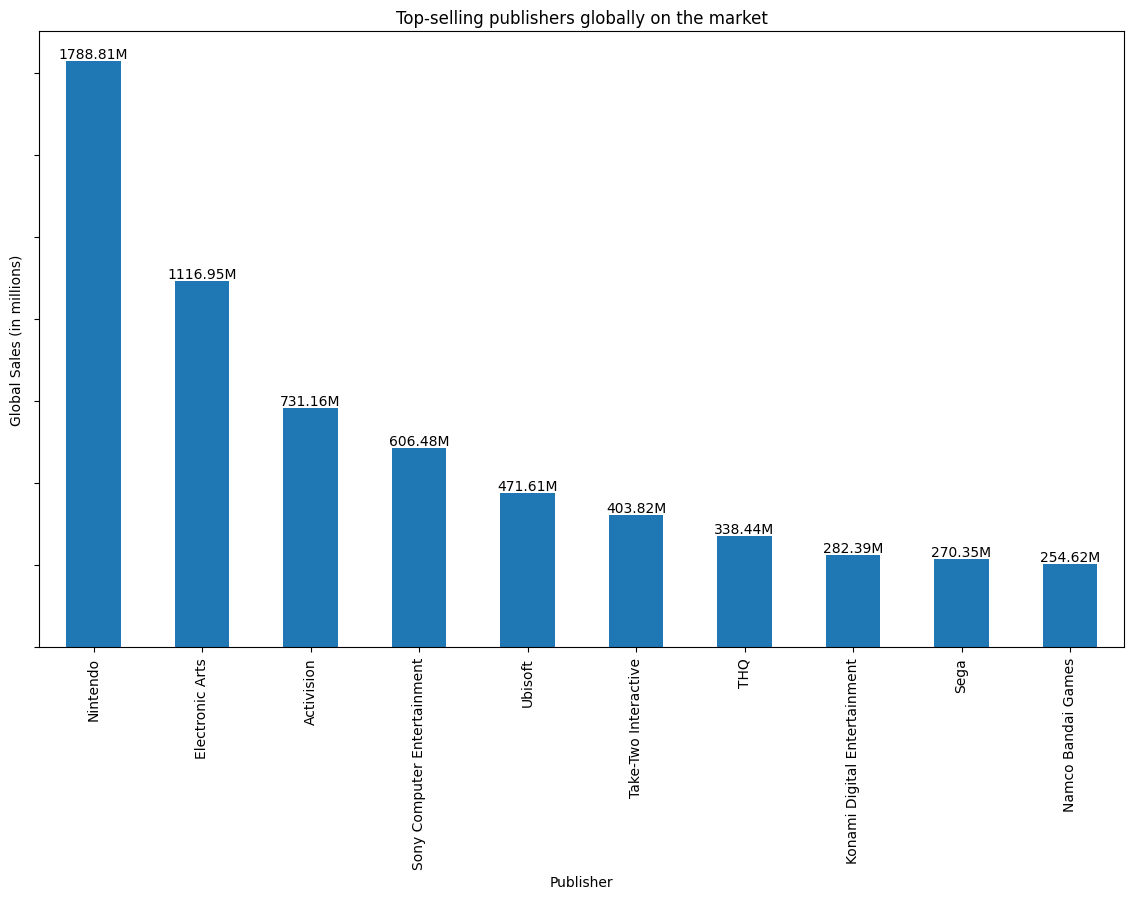

In [ ]:
# Group by publisher and sum the global sales
publisher_sales = sales_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Create the bar plot
ax = publisher_sales.plot(kind='bar', figsize=(14, 8), title="Top-selling publishers globally on the market")

# Remove y-axis labels
ax.set(yticklabels=[])

# Add individual labels for each bar
for i, value in enumerate(publisher_sales):
    ax.text(i, value, f"{value:.2f}M", ha='center', va='bottom')

plt.ylabel('Global Sales (in millions)')
plt.show()

- How do sales from top publishers vary by region?

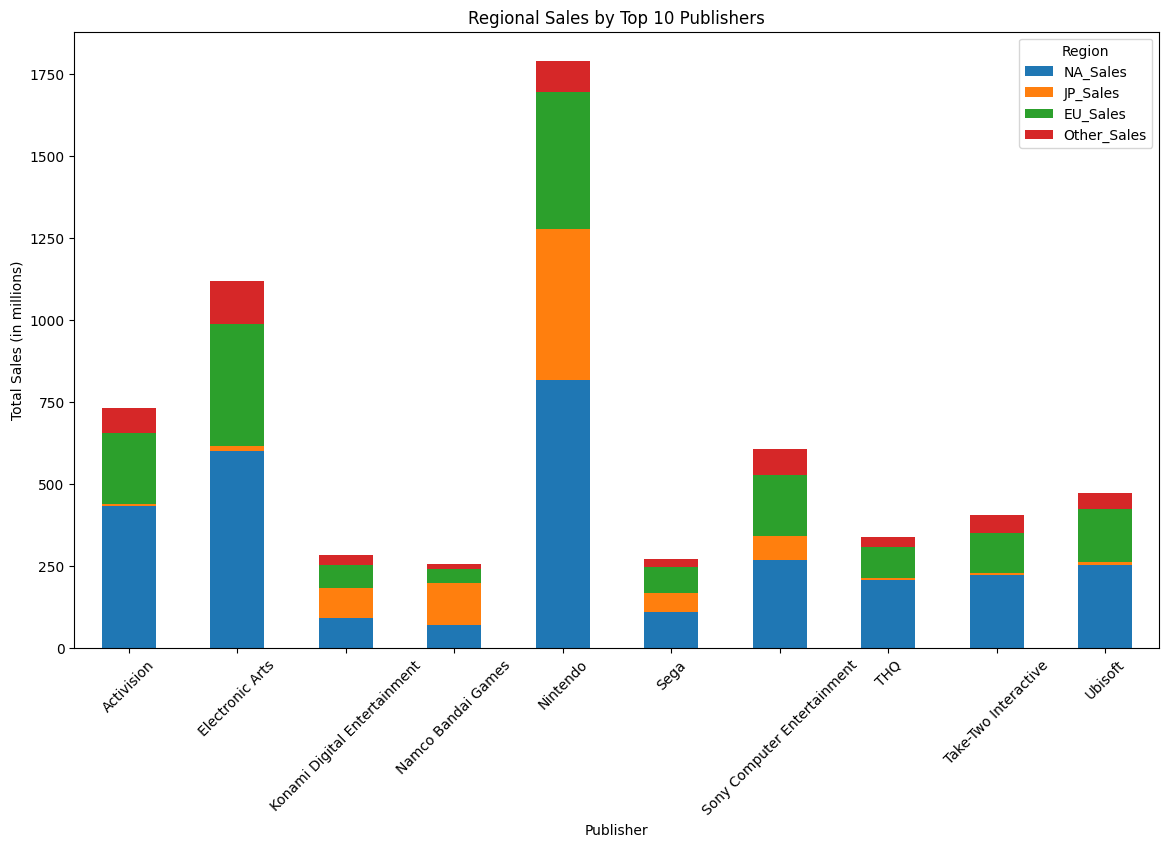

In [ ]:
# Aggregate total global sales by publisher
publisher_sales = sales_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Identify top 10 publishers based on global sales
top_publishers = publisher_sales.head(10).index

# Filter the dataset to include only the top publishers
top_publishers_df = sales_df[sales_df['Publisher'].isin(top_publishers)]

# Aggregate sales data by publisher and region
regional_sales_by_publisher = top_publishers_df.groupby('Publisher')[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum()

# Plot sales by region for top publishers
regional_sales_by_publisher.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Regional Sales by Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()

### 5- Temporal trends 

 - How do sales trends differ between region by year ?

In [ ]:
# Calculate summary statistics
summary_stats = sales_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
           NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  16716.000000  16716.000000  16716.000000  16716.000000  16716.000000
mean       0.263271      0.145019      0.077614      0.047335      0.533493
std        0.813497      0.503317      0.308844      0.186726      1.547997
min        0.000000      0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.030000      0.470000
max       41.360000     28.960000     10.220000     10.570000     82.530000


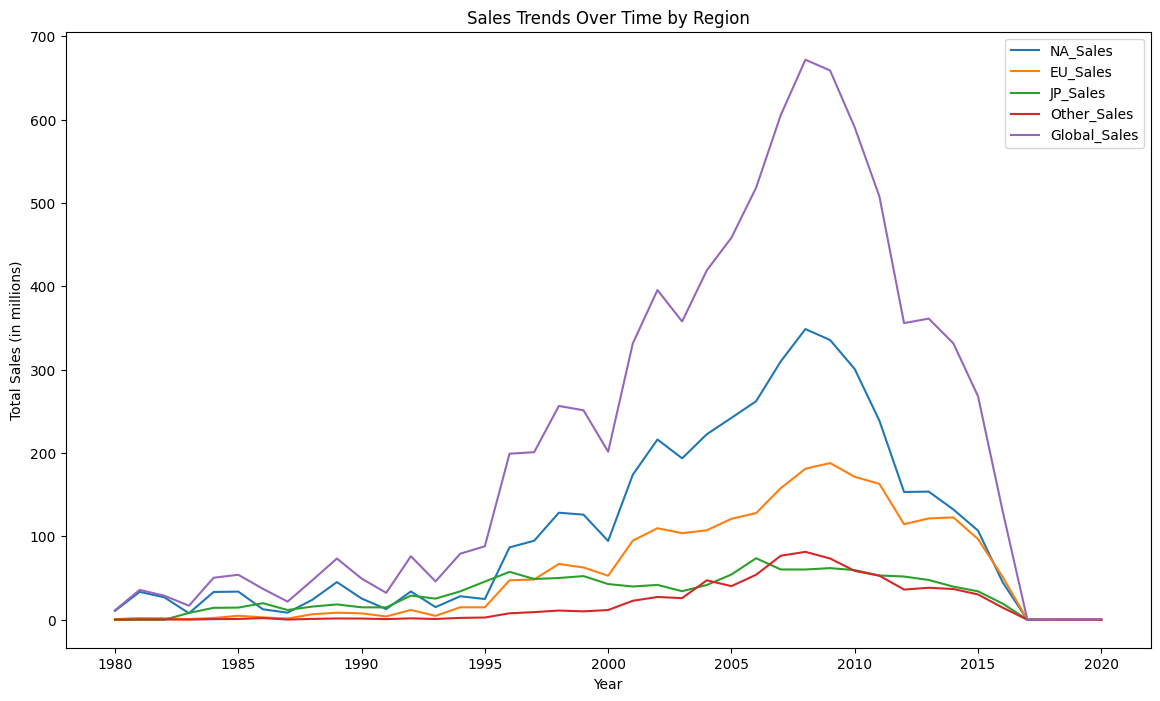

In [ ]:
# Plot sales over time for each region
plt.figure(figsize=(14, 8))
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
    sales_by_year = sales_df.groupby('Year_of_Release')[region].sum()
    plt.plot(sales_by_year, label=region)
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.title('Sales Trends Over Time by Region')
plt.legend()
plt.show()

- Another way to do it

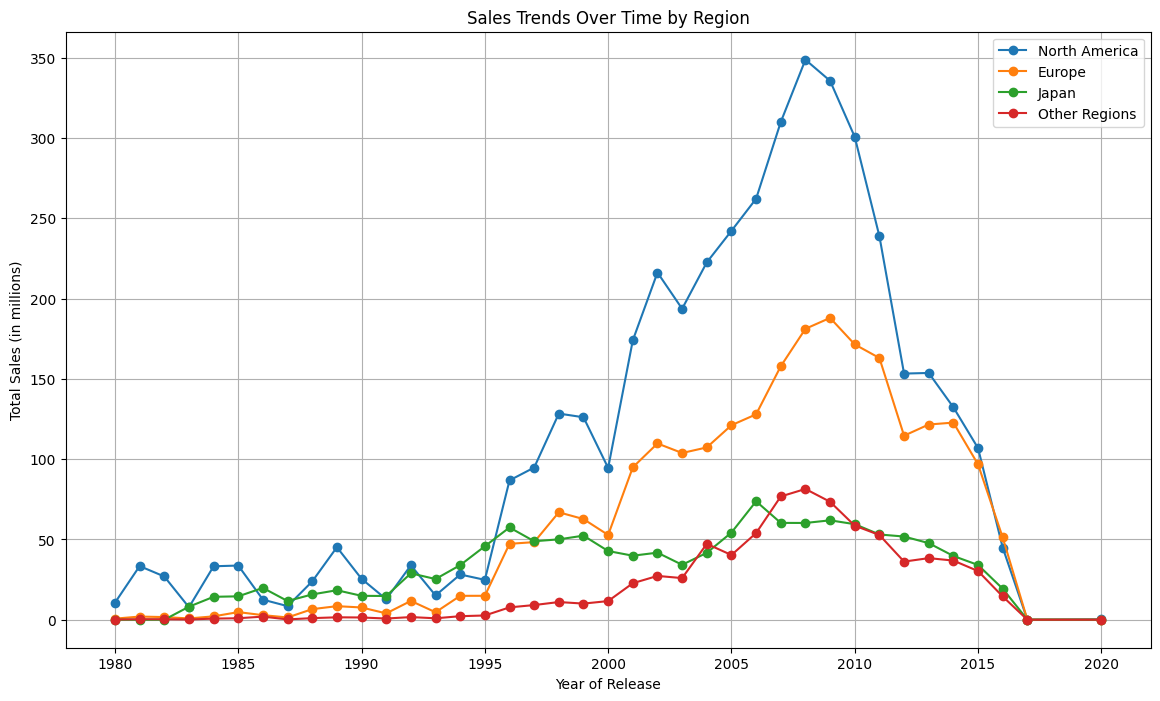

In [ ]:
# Drop rows with NaN values in the Year_of_Release column
df = sales_df.dropna(subset=['Year_of_Release'])

# Aggregate sales data by year for each region
sales_by_year = sales_df.groupby('Year_of_Release').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Plot sales trends for each region
plt.figure(figsize=(14, 8))
plt.plot(sales_by_year.index, sales_by_year['NA_Sales'], label='North America', marker='o')
plt.plot(sales_by_year.index, sales_by_year['EU_Sales'], label='Europe', marker='o')
plt.plot(sales_by_year.index, sales_by_year['JP_Sales'], label='Japan', marker='o')
plt.plot(sales_by_year.index, sales_by_year['Other_Sales'], label='Other Regions', marker='o')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.title('Sales Trends Over Time by Region')
plt.legend()
plt.grid(True)
plt.show()

### 6- Correlations and Relationships

- Are there genres or platforms that are particularly popular in one region but not in others?

In [ ]:
# Aggregate sales data by genre and platform for each region
genre_sales_by_region = sales_df.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
platform_sales_by_region = sales_df.groupby('Platform').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Calculate total global sales by genre and platform
genre_sales_by_region['Global_Sales'] = genre_sales_by_region.sum(axis=1)
platform_sales_by_region['Global_Sales'] = platform_sales_by_region.sum(axis=1)

# Calculate the ratio of regional sales to global sales for each genre and platform
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    genre_sales_by_region[f'{region}_Ratio'] = genre_sales_by_region[region] / genre_sales_by_region['Global_Sales']
    platform_sales_by_region[f'{region}_Ratio'] = platform_sales_by_region[region] / platform_sales_by_region['Global_Sales']


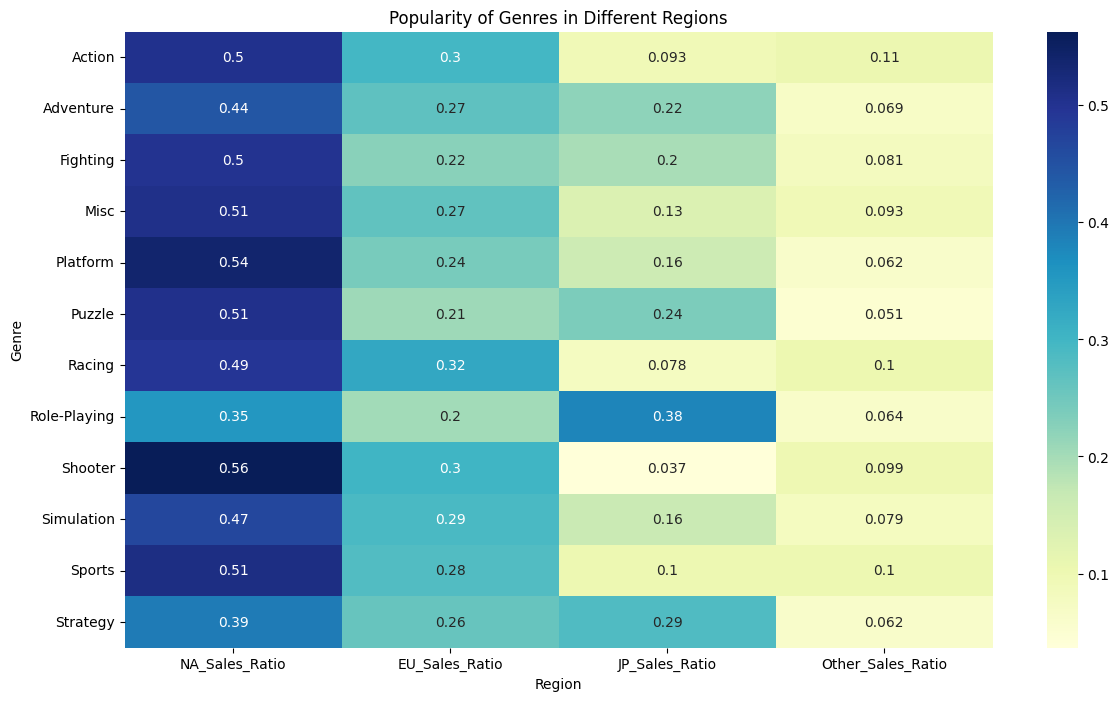

In [ ]:
# Visualize the popularity of genres in different regions
plt.figure(figsize=(14, 8))
sns.heatmap(genre_sales_by_region[[f'{region}_Ratio' for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]],
            annot=True, cmap='YlGnBu')
plt.title('Popularity of Genres in Different Regions')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.show()

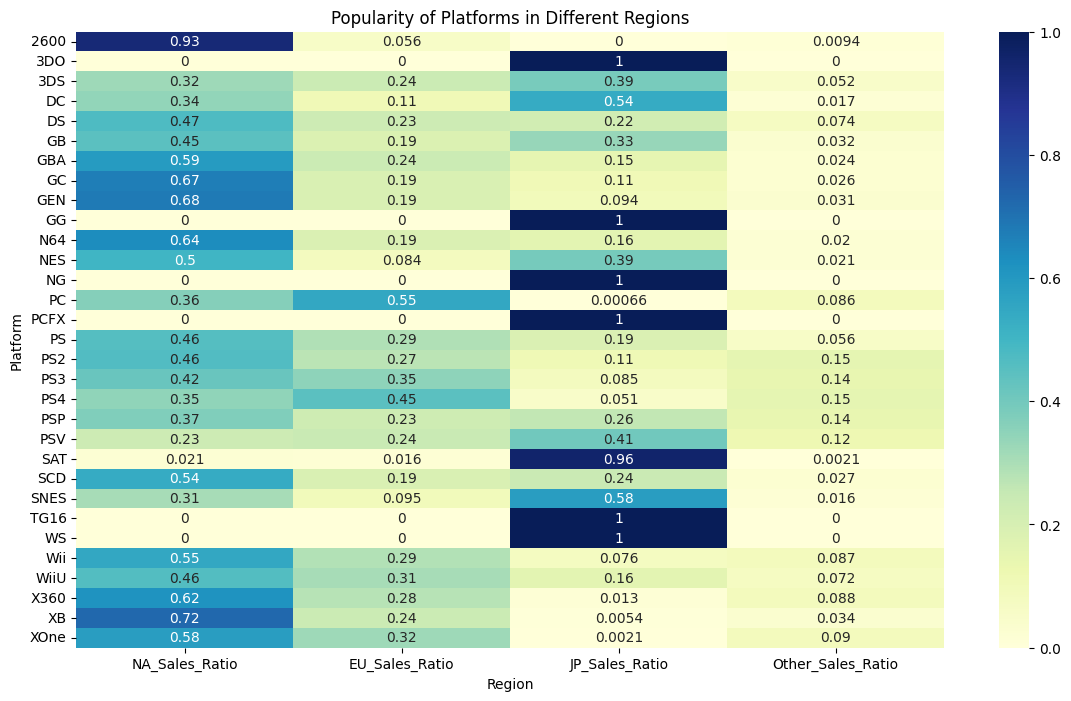

In [ ]:
# Visualize the popularity of platforms in different regions
plt.figure(figsize=(14, 8))
sns.heatmap(platform_sales_by_region[[f'{region}_Ratio' for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]],
            annot=True, cmap='YlGnBu')
plt.title('Popularity of Platforms in Different Regions')
plt.xlabel('Region')
plt.ylabel('Platform')
plt.show()

### 7-Market Share:

- What is the market share of different platforms, genres, and publishers?

In [ ]:
# Calculate total sales for platforms, genres, and publishers
platform_sales = sales_df.groupby('Platform')['Global_Sales'].sum()
genre_sales = sales_df.groupby('Genre')['Global_Sales'].sum()
publisher_sales = sales_df.groupby('Publisher')['Global_Sales'].sum()

# Calculate total global sales
total_global_sales = sales_df['Global_Sales'].sum()

# Calculate market share
platform_market_share = (platform_sales / total_global_sales) * 100
genre_market_share = (genre_sales / total_global_sales) * 100
publisher_market_share = (publisher_sales / total_global_sales) * 100

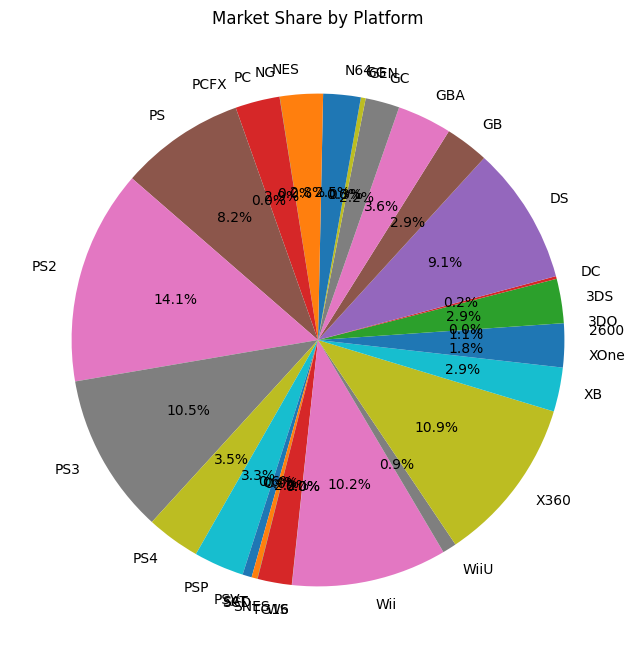

In [ ]:
# Plot market share for platforms
plt.figure(figsize=(12, 8))
platform_market_share.plot(kind='pie', autopct='%1.1f%%')
plt.title('Market Share by Platform')
plt.ylabel('')
plt.show()

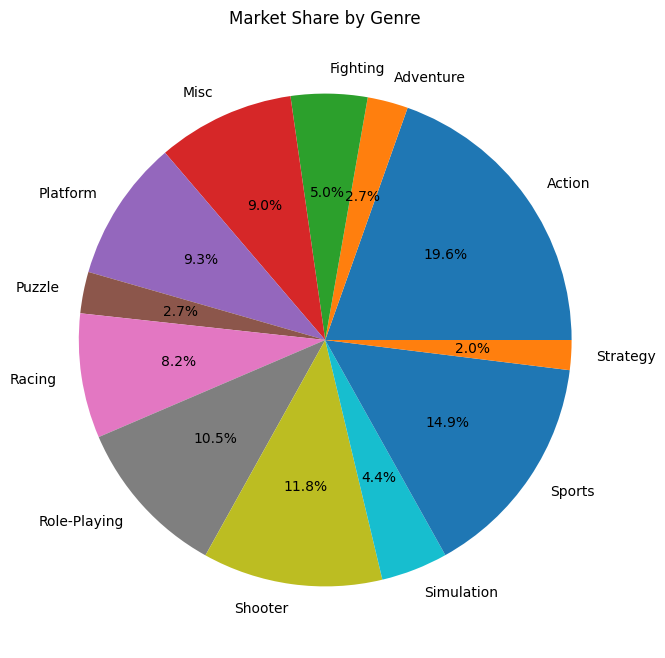

In [ ]:
# Plot market share for genres
plt.figure(figsize=(12, 8))
genre_market_share.plot(kind='pie', autopct='%1.1f%%')
plt.title('Market Share by Genre')
plt.ylabel('')
plt.show()

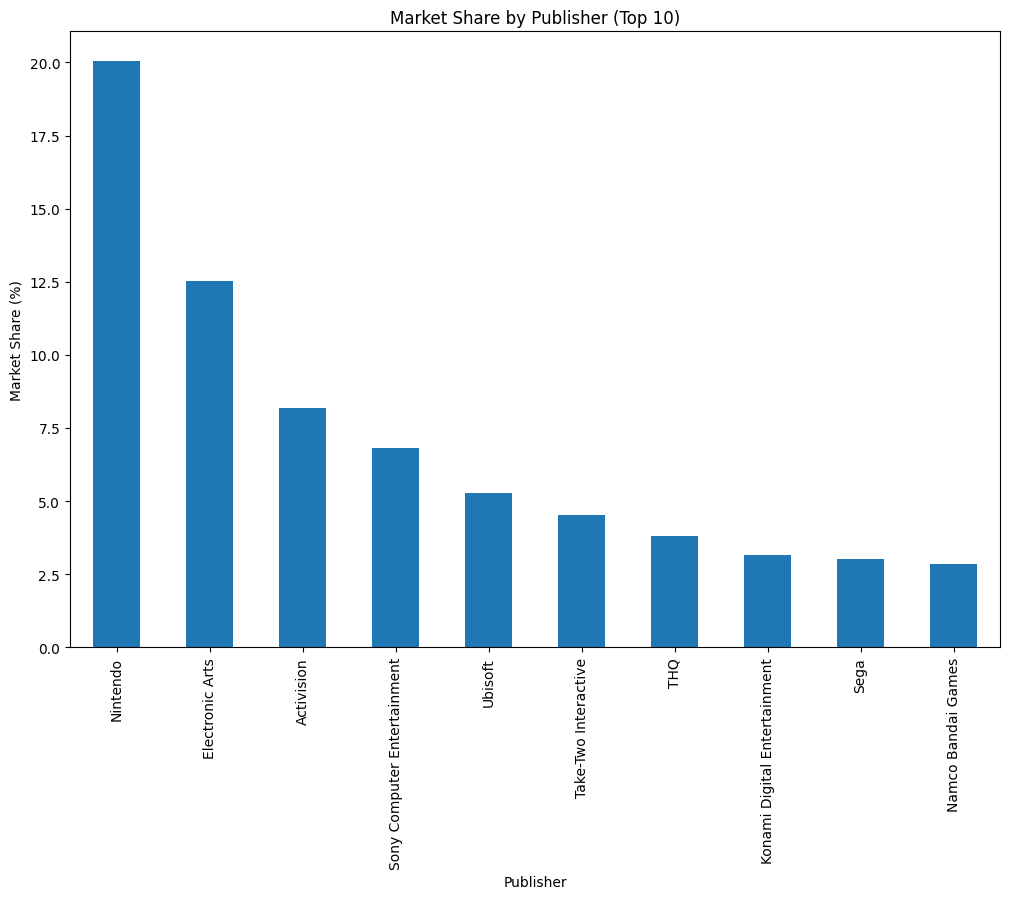

In [ ]:
# Plot market share for publishers
plt.figure(figsize=(12, 8))
top_publishers = publisher_market_share.sort_values(ascending=False).head(10) # Display top 10 publishers
top_publishers.plot(kind='bar')
plt.title('Market Share by Publisher (Top 10)')
plt.ylabel('Market Share (%)')
plt.xlabel('Publisher')
plt.show()

## Key findings, Insigths and Conclusion